### 1. Prepare Data
#### csv 파일 출처 : https://gist.github.com/vladislaveme

### 2. Load Data

In [31]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

csv = pd.read_csv('autos.csv', encoding='latin-1')
print(">> csv: ", len(csv), len(csv.columns.values), "columns: ", csv.columns.values)

# 필요없는 열 제거
csv = csv.drop('dateCrawled', 1).drop('name', 1).drop('seller', 1).drop('offerType', 1).drop('nrOfPictures', 1).drop('postalCode', 1).drop('lastSeen', 1)
print(">> csv after drop col: ", len(csv), len(csv.columns.values), "columns: ", csv.columns.values)

# na 행 제거
csv = csv.dropna()
print(">> csv after drop na: ", len(csv), len(csv.columns.values))

>> csv:  20001 20 columns:  ['dateCrawled' 'name' 'seller' 'offerType' 'price' 'abtest' 'vehicleType'
 'yearOfRegistration' 'gearbox' 'powerPS' 'model' 'kilometer'
 'monthOfRegistration' 'fuelType' 'brand' 'notRepairedDamage'
 'dateCreated' 'nrOfPictures' 'postalCode' 'lastSeen']
>> csv after drop col:  20001 13 columns:  ['price' 'abtest' 'vehicleType' 'yearOfRegistration' 'gearbox' 'powerPS'
 'model' 'kilometer' 'monthOfRegistration' 'fuelType' 'brand'
 'notRepairedDamage' 'dateCreated']
>> csv after drop na:  16375 13


### 3. 상관관계 분석

In [32]:
from sklearn import preprocessing, svm
from sklearn.preprocessing import StandardScaler, Normalizer

cor_csv = csv.copy()
columns = list(cor_csv.columns)
labels = ['abtest', 'vehicleType', 'gearbox', 'model', 'fuelType', 'brand', 'notRepairedDamage', 'dateCreated']
les= {}
for l in labels:
    les[l] = preprocessing.LabelEncoder()
    les[l].fit(cor_csv[l])
    tr = les[l].transform(cor_csv[l]) 
    cor_csv.loc[:, l + '_label'] = pd.Series(tr, index=cor_csv.index)

cor_csv = cor_csv[columns+[x+'_label' for x in labels]]
cor_csv.corr()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,abtest_label,vehicleType_label,gearbox_label,model_label,fuelType_label,brand_label,notRepairedDamage_label,dateCreated_label
price,1.000000,0.497363,0.489680,-0.471431,0.018309,-0.007555,0.006876,-0.314431,-0.009495,0.186189,-0.133239,0.164157,0.011747
yearOfRegistration,0.497363,1.000000,0.177356,-0.430430,0.023834,-0.016088,0.003347,-0.097910,0.064895,0.245679,-0.038107,0.100032,-0.012846
powerPS,0.489680,0.177356,1.000000,-0.008731,0.018256,-0.004926,0.114557,-0.379622,-0.122751,0.140784,-0.275004,0.042133,0.008143
kilometer,-0.471431,-0.430430,-0.008731,1.000000,-0.012489,0.001667,0.039740,0.026937,-0.028894,0.131697,-0.027274,-0.098798,0.005439
monthOfRegistration,0.018309,0.023834,0.018256,-0.012489,1.000000,-0.013128,0.021558,-0.017963,0.011836,0.049190,0.000405,0.009035,-0.001074
abtest_label,-0.007555,-0.016088,-0.004926,0.001667,-0.013128,1.000000,-0.000007,-0.003752,-0.003268,-0.003882,0.008514,0.003973,-0.013045
vehicleType_label,0.006876,0.003347,0.114557,0.039740,0.021558,-0.000007,1.000000,-0.109559,-0.189916,0.034896,-0.125441,0.000265,-0.010745
gearbox_label,-0.314431,-0.097910,-0.379622,0.026937,-0.017963,-0.003752,-0.109559,1.000000,0.042820,-0.161245,0.129385,-0.016688,-0.002617
model_label,-0.009495,0.064895,-0.122751,-0.028894,0.011836,-0.003268,-0.189916,0.042820,1.000000,0.043082,0.491433,-0.004020,-0.003521
fuelType_label,0.186189,0.245679,0.140784,0.131697,0.049190,-0.003882,0.034896,-0.161245,0.043082,1.000000,-0.050326,0.005730,-0.014684


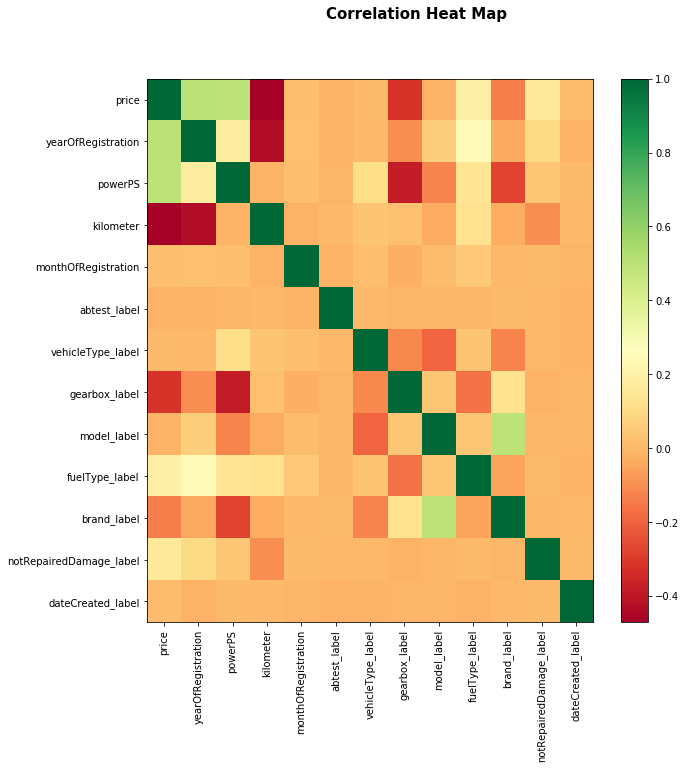

In [86]:
import matplotlib.pyplot as plt

def correlation_graph(a):
    corr = a.corr()
    names = columns
    plt.figure(figsize=(10, 10))
    plt.imshow(corr, cmap='RdYlGn', interpolation='none', aspect='auto')
    plt.colorbar()
    plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr)), corr.columns);
    plt.suptitle('Correlation Heat Map', fontsize=15, fontweight='bold')
    plt.show()

%matplotlib inline
correlation_graph(cor_csv)

### 4. 데이터 추가적인 전처리 & 결과 csv 저장

In [75]:
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from datetime import datetime

CSV_NAME = 'autos_preprocessed.csv'
CSV_TEST_NAME = 'autos_test.csv'

cdata = csv.copy()

# 정규화
cdata['price'] = minmax_scale(cdata['price'].astype(float))
cdata['powerPS'] = minmax_scale(cdata['powerPS'].astype(float))
cdata['kilometer'] = minmax_scale(cdata['kilometer'].astype(float))
cdata['yearOfRegistration'] = minmax_scale(cdata['yearOfRegistration'].astype(float))
#cdata['monthOfRegistration'] = minmax_scale(cdata['monthOfRegistration'].astype(float))

# boolean 변환
cdata['notRepairedDamage'] = cdata['notRepairedDamage'].mask(cdata['notRepairedDamage'] == 'ja', 1)\
                                                    .mask(cdata['notRepairedDamage'] == 'nein', 0)

# 날짜 데이터 변환 & 정규화
#cdata['dateCreated'] = pd.to_datetime(cdata['dateCreated']).values.astype(int) // 10 ** 9
#cdata['dateCreated'] = minmax_scale(cdata['dateCreated'].astype(float))

# one-hot encoding
cdata = cdata.join(pd.get_dummies(cdata['gearbox'], prefix='gearbox'))\
        .join(pd.get_dummies(cdata['fuelType'], prefix='fuelType'))\
        .join(pd.get_dummies(cdata['brand'], prefix='brand'))
        #.join(pd.get_dummies(cdata['abtest'], prefix='abtest'))\
        #.join(pd.get_dummies(cdata['vehicleType'], prefix='vehicleType'))\
        #.join(pd.get_dummies(cdata['model'], prefix='model'))
cdata = cdata.drop('abtest', 1)\
        .drop('vehicleType', 1)\
        .drop('model', 1)\
        .drop('dateCreated', 1)\
        .drop('monthOfRegistration', 1)\
        .drop('gearbox', 1)\
        .drop('fuelType', 1)\
        .drop('brand', 1)
print(">> csv after onehot: ", len(cdata), len(cdata.columns.values))

cdata[:9825].to_csv(CSV_NAME, index=False)
cdata[9825:].to_csv(CSV_TEST_NAME, index=False)
print('preprocessed csv saved at', CSV_NAME, CSV_TEST_NAME)

# data, label 분리
#label = cdata.iloc[:, 1:2].values
#data = cdata.iloc[:, :1].join(cdata.iloc[:, 2:]).values

# 학습 데이터, 테스트 데이터 나누기
#data_train, data_test, label_train, label_test = train_test_split(data, label)
#print(">> finished loading data")
#print("  data train: ", data_train.shape, "label train: ", label_train.shape)
#print("  data test:   ", data_test.shape, "label test:   ", label_test.shape)

>> csv after onehot:  16375 53
preprocessed csv saved at autos_preprocessed.csv autos_test.csv


### 5. 중고차 가격 모델 학습 및 저장

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

import tensorflow as tf
import numpy as np
tf.set_random_seed(777)  # for reproducibility

MODEL_DIR = "ckpt"
MODEL_CKPT = "ckpt/auto_weight.ckpt"

xy = np.loadtxt('autos_preprocessed.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 1:]
y_data = xy[:, [0]]

NUM_OF_COL = np.size(x_data, axis=1)

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, NUM_OF_COL])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([NUM_OF_COL, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hypothesis = tf.matmul(X, W) + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# test
accuracy = tf.reduce_mean(1 - abs(hypothesis - Y))

# Launch the graph in a session.
sess = tf.Session()
saver = tf.train.Saver()

# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

# 기존 ckpt 불러오기
ckpt = tf.train.get_checkpoint_state(MODEL_DIR)
if ckpt and ckpt.model_checkpoint_path:
    saver.restore(sess, MODEL_CKPT)
    print("load model from ... ", MODEL_CKPT)

for step in range(150000):
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})
    if step % 1000 == 0:
        print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)
        saver.save(sess, MODEL_CKPT)
        saver.save(sess, MODEL_CKPT + '_{0}'.format(step))

# Test
xy_test = np.loadtxt('autos_test.csv', delimiter=',', dtype=np.float32)
x_test = xy_test[:, 1:]
y_test = xy_test[:, [0]]

prediction, score = sess.run([hypothesis, accuracy], feed_dict={X: x_test, Y: y_test})
print('prediction: ', prediction)
print('score: {0} %'.format(score * 100))

# 오차율 계산
max_error = 0
p = 0
l = 0
for i in range(np.size(x_test, 0)):
    error = abs(prediction[i] - y_test[i])
    if (max_error < error):
        p = prediction[i]
        l = y_test[i]
        max_error = error

print(p, l, max_error)
diff = abs(prediction - y_test)
print(diff.min(axis=0)[0], '~', diff.max(axis=0)[0])

sess.close()

0 Cost:  1.8723754 
Prediction:
 [[-0.43144715]
 [-2.48157   ]
 [-1.757479  ]
 ...
 [ 2.0713515 ]
 [-5.4170084 ]
 [-1.5014744 ]]
1000 Cost:  0.28826874 
Prediction:
 [[ 0.12650573]
 [-0.52317595]
 [-0.10592777]
 ...
 [ 2.342052  ]
 [-3.8362424 ]
 [ 0.06187975]]
2000 Cost:  0.16921625 
Prediction:
 [[ 0.04883343]
 [-0.25551063]
 [-0.03334874]
 ...
 [ 2.1657112 ]
 [-3.0806518 ]
 [ 0.19618672]]
3000 Cost:  0.112602204 
Prediction:
 [[ 0.03050154]
 [-0.12430722]
 [-0.02173716]
 ...
 [ 1.9984512 ]
 [-2.5345912 ]
 [ 0.23022747]]
4000 Cost:  0.07965333 
Prediction:
 [[ 0.02545416]
 [-0.04770797]
 [-0.02005297]
 ...
 [ 1.8444854 ]
 [-2.114057  ]
 [ 0.24378133]]
5000 Cost:  0.059071876 
Prediction:
 [[ 2.3765743e-02]
 [ 9.4765425e-04]
 [-2.0399749e-02]
 ...
 [ 1.7039049e+00]
 [-1.7820749e+00]
 [ 2.5149983e-01]]
6000 Cost:  0.045626402 
Prediction:
 [[ 0.022995  ]
 [ 0.03310335]
 [-0.02097982]
 ...
 [ 1.575506  ]
 [-1.5172129 ]
 [ 0.25686324]]
7000 Cost:  0.03651542 
Prediction:
 [[ 0.0225293 ]


61000 Cost:  0.005153902 
Prediction:
 [[ 0.02152243]
 [ 0.11729357]
 [-0.00828496]
 ...
 [ 0.17816451]
 [ 0.01554999]
 [ 0.2762744 ]]
62000 Cost:  0.005131819 
Prediction:
 [[ 0.02151948]
 [ 0.11729351]
 [-0.00824821]
 ...
 [ 0.17727506]
 [ 0.0197694 ]
 [ 0.27626246]]
63000 Cost:  0.005110665 
Prediction:
 [[ 0.02151942]
 [ 0.11729002]
 [-0.00821084]
 ...
 [ 0.1764698 ]
 [ 0.02385846]
 [ 0.27624655]]
64000 Cost:  0.005090371 
Prediction:
 [[ 0.02151948]
 [ 0.11728817]
 [-0.0081774 ]
 ...
 [ 0.1757384 ]
 [ 0.02781841]
 [ 0.2762257 ]]
65000 Cost:  0.0050708787 
Prediction:
 [[ 0.02151674]
 [ 0.11728776]
 [-0.00814319]
 ...
 [ 0.17508084]
 [ 0.03167203]
 [ 0.27621102]]
66000 Cost:  0.005052167 
Prediction:
 [[ 0.02151507]
 [ 0.1172801 ]
 [-0.00811267]
 ...
 [ 0.17449558]
 [ 0.03542227]
 [ 0.27620244]]
67000 Cost:  0.005034161 
Prediction:
 [[ 0.02151239]
 [ 0.11727312]
 [-0.00808609]
 ...
 [ 0.17397025]
 [ 0.03905633]
 [ 0.27618477]]
68000 Cost:  0.0050168186 
Prediction:
 [[ 0.02151319]

122000 Cost:  0.004550461 
Prediction:
 [[ 0.02124837]
 [ 0.11647919]
 [-0.00781801]
 ...
 [ 0.1732426 ]
 [ 0.13656509]
 [ 0.27591953]]


### 6. 모델 테스트